#**Aula 2 de Labortório de Aprendizado de Máquina**
#Regressão Linear e Classificação Baseada em Distância



In [211]:
# Instalação
!pip install scikit-learn

##Imports das bibliotecas principais

In [212]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import feature_selection
import matplotlib.pyplot as plt

##Regressão Linear

**1) Obtenha por regressão linear uma função que relaciona a variável x com a variável y. Verifique o efeito de padronizar por Z-score (média zero e desvio padrão unitário) x e y (com os dados de treinamento)**

coeficientes método da pseudo inversa: [2.20847145 2.93993397]
RMSE: 1.0737
coeficientes método do sklearn: [[2.20847145]
 [2.93993397]]
RMSE do sklearn: 1.0737


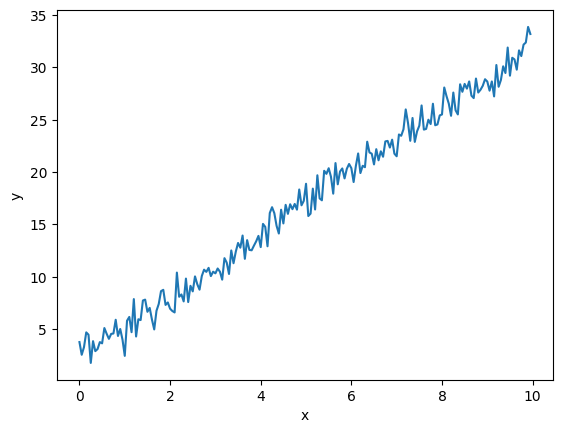

In [213]:
np.random.seed(0)

x = np.arange(0,10, 0.05)
y = 2 + 3*x + np.random.normal(size=(200))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

x_train = x[0:100]
y_train = y[0:100]

x_test = x[100:]
y_test = y[100:]

#Z-score
# mean_x = np.mean(x_train)
# std_x = np.std(x_train)
# mean_y = np.mean(y_train)
# std_y = np.std(y_train)

# x_train = (x_train - mean_x)/std_x
# x_test = (x_test - mean_x)/std_x
# y_train = (y_train - mean_y)/std_y
# y_test = (y_test - mean_y)/std_y

X = np.vstack((np.ones(100),x_train)).T
w = np.linalg.inv(X.T @ X) @ X.T @ y_train
print(f'coeficientes método da pseudo inversa: {w}')

y_est = np.vstack((np.ones(100),x_test)).T @ w

RMSE = np.sqrt(np.sum((y_est - y_test)**2)/y_test.size)
print(f'RMSE: {"{:.4f}".format(RMSE)}')

x_train = np.array([x_train]).T
y_train = np.array([y_train]).T

reg = linear_model.LinearRegression().fit(x_train, y_train)
print(f'coeficientes método do sklearn: {np.vstack([reg.intercept_, reg.coef_])}')

x_test = np.array([x_test]).T
y_test = np.array([y_test]).T
RMSE = np.sqrt(np.sum((reg.predict(x_test) - y_test)**2)/y_test.size)
print(f'RMSE do sklearn: {"{:.4f}".format(RMSE)}')

**2) Estime os valores das casas da base de dados california_housing por regressão linear**

In [214]:
raw_data = datasets.fetch_california_housing()
print(raw_data.DESCR)

data = pd.DataFrame(np.c_[raw_data["data"],raw_data["target"]], columns=list(raw_data["feature_names"]) + ["target"])
display(data.head())
data.describe()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [215]:
features_of_interest = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]
X_train = data.iloc[0:15000][features_of_interest]
X_test = data.iloc[15000:][features_of_interest]

y_train = data.iloc[0:15000]["target"]
y_test = data.iloc[15000:]["target"]

reg = linear_model.LinearRegression().fit(X_train, y_train)
print(f'coeficientes método do sklearn: {np.hstack([reg.intercept_, reg.coef_])}')
RMSE = np.sqrt(np.sum((reg.predict(X_test) - y_test)**2)/y_test.shape[0]) # Root Mean Square Error - vai ser anormalmente alto pois o fenômeno é mais complexo do que a regressão linear consegue processar
print(f'RMSE do sklearn: {"{:.4f}".format(RMSE)}')

# ---- LASSO ----
# Modelo mais avançado de redes neurais, seleciona os atributos mais relevantes tentando zerar alguns coeficientes
reg = linear_model.Lasso().fit(X_train, y_train)
print(f'coeficientes método do sklearn: {np.hstack([reg.intercept_, reg.coef_])}')
RMSE = np.sqrt(np.sum((reg.predict(X_test) - y_test)**2)/y_test.shape[0])
print(f'RMSE do sklearn: {"{:.4f}".format(RMSE)}')

coeficientes método do sklearn: [-3.01923071e+01  4.43133772e-01  6.88834433e-03 -1.06225623e-01
  6.21297542e-01 -1.22453044e-05 -7.81556745e-03 -3.85358132e-01
 -3.67814616e-01]
RMSE do sklearn: 0.7757
coeficientes método do sklearn: [ 1.44287601e+00  1.33954715e-01  1.93505695e-03  0.00000000e+00
 -0.00000000e+00 -1.51601988e-05 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00]
RMSE do sklearn: 1.0903


**3) Use o kNN para classificar a base de dados iris. Use métodos de hold-out e k-fold para avaliar o resultado. Use o método de Grid Search para encontrar o melhor valor de k**

In [216]:
raw_data = datasets.load_iris()
print(raw_data.DESCR)

data = pd.DataFrame(np.c_[raw_data["data"],raw_data["target"]], columns=list(raw_data["feature_names"]) + ["target"])
display(data.head())
data.describe()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [217]:

X = data.drop(columns=["target"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y) 

model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train,y_train)
model.predict(X_test)
acc = model.score(X_test, y_test)
print(f"Acurácia: {acc*100}%")

#k-fold
cv_scores = cross_val_score(model, X, y, cv=5, scoring = "accuracy")
print(cv_scores)
print("cv_scores médio:{}".format(np.mean(cv_scores)))

#Grid Search
model = neighbors.KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 10)}
knn_gscv = GridSearchCV(model, param_grid, cv=5) #cv = cross validation do kfold
knn_gscv.fit(X_train, y_train)
print(f"Melhor valor de k: {knn_gscv.best_params_} e melhor resultado: {knn_gscv.best_score_}")

#for dicts in knn_gscv.best_params_:
#  k = knn_gscv.best_params_[dicts]

#model = neighbors.KNeighborsClassifier(n_neighbors = k)
#model.fit(X_train,y_train)
#model.predict(X_test)
#acc = model.score(X_test, y_test)
#print(f"Acurácia: {acc*100}%")

Acurácia: 96.66666666666667%
[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
cv_scores médio:0.9666666666666668


Melhor valor de k: {'n_neighbors': 3} e melhor resultado: 0.975


**4) Realize a classificação da base de dados Wine com o kNN e o Rocchio. Avalie o uso de Z-score e do SFS para seleção de features**

In [218]:
raw_data = datasets.load_wine()
print(raw_data.DESCR)

data = pd.DataFrame(np.c_[raw_data["data"],raw_data["target"]], columns=list(raw_data["feature_names"]) + ["target"])
display(data.head())
data.describe()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [220]:
X = data.drop(columns=["target"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)


#Z-score
# mean_X = np.mean(X_train,axis=0)
# std_X = np.std(X_train,axis=0)
# X_train = (X_train - mean_X)/std_X
# X_test = (X_test - mean_X)/std_X


#SFS
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
# sfs = feature_selection.SequentialFeatureSelector(model,n_features_to_select=3)
sfs = feature_selection.SequentialFeatureSelector(model,n_features_to_select=1)   # selecionando apenas uma característica ao invés de 3
sfs.fit(X_train, y_train)
print(sfs.get_support())
X_train = sfs.transform(X_train)
X_test = sfs.transform(X_test)


model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train,y_train)
model.predict(X_test)
acc = model.score(X_test, y_test)
print(f"Acurácia do kNN: {acc*100}%")


# #Rocchio ou Classificador Baseado em Centroide
# classes = y_train.unique()
# X_train_prot = np.zeros([classes.size,X_train.shape[1]])
# y_train_prot = np.zeros([classes.size,1])
# for classe in range(0,classes.size):
#  X_train_prot[classe] = np.mean(X_train[y_train==classe],axis=0)
#  y_train_prot[classe] = classe
# y_train_prot = y_train_prot.ravel()

#print(X_train_prot)

#model = neighbors.KNeighborsClassifier(n_neighbors = 1)
#model.fit(X_train_prot,y_train_prot)
#model.predict(X_test)
#acc = model.score(X_test, y_test)
#print(f"Acurácia do Rocchio implementado: {acc*100}%")

model = neighbors.NearestCentroid()
model.fit(X_train,y_train)
#print(model.centroids_)
model.predict(X_test)
acc = model.score(X_test, y_test)
print(f"Acurácia do Rocchio do sklearn: {acc*100}%")



[False False False False False False  True False False False False False
 False]
Acurácia do kNN: 77.77777777777779%
Acurácia do Rocchio do sklearn: 75.0%
